 Evaluación subjetiva de imágenes mejoradas usando Python, mostrando cada imagen con una zona ampliada o ROI (Region of Interest)


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from utils import *
import matplotlib.patches as patches
#from ImagePreprocessing.utils import *
from utils import *



In [2]:


def mostrar_imagen_con_roi(imagen, roi, titulo, esquina_superior_izquierda, ancho, alto):
    """
    Muestra una imagen con una zona ampliada o ROI.

    Parámetros:
        imagen: La imagen a mostrar.
        roi: La zona ampliada (ROI).
        titulo: El título de la ventana.
        esquina_superior_izquierda: Una tupla (x, y) que representa las coordenadas de la esquina superior izquierda de la ROI.
        ancho: El ancho de la ROI.
        alto: El alto de la ROI.
    """
    # Crear una figura de Matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Mostrar la imagen original en el primer eje
    axes[0].imshow(imagen, cmap='gray')
    axes[0].set_title(titulo)
    axes[0].axis('off')

    # Dibujar un rectángulo alrededor de la ROI en la imagen original
    rect = patches.Rectangle(esquina_superior_izquierda, ancho, alto, linewidth=1, edgecolor='r', facecolor='none')
    axes[0].add_patch(rect)

    # Mostrar la zona ampliada (ROI) en el segundo eje
    axes[1].imshow(roi, cmap='gray')
    axes[1].set_title('Zona ampliada')
    axes[1].axis('off')

    # Ajustar el layout de la figura
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

In [7]:
path = r"D:\Documentos\Universidad de Cuenca\Trabajo de Titulación\ImagenesTesis\Desarrollo\Preprocesamiento_Imagenes\Mejora de contraste"
entrada_path = read_folder_path(path)
salida_path = read_folder_path(path + "\\imgROI")

dataset_Comparacion = read_images(entrada_path)
#print("Cantidad de imagenes: ", len(dataset_Comparacion))

imagen_original = dataset_Comparacion[5]
imagen_mejorada_CLAHE = dataset_Comparacion[0]
imagen_mejorada_HE = dataset_Comparacion[1]
imagen_mejorada_MMCE = dataset_Comparacion[2]
imagen_mejorada_NoBG = dataset_Comparacion[3]
imagen_mejorada_NoBG_CLAHE = dataset_Comparacion[4]


In [13]:
# Define el tamaño del ROI (en píxeles)
roi_ancho = 128
roi_alto = 128

# Define la posición del ROI (en coordenadas x, y)
roi_x = 500
roi_y = 256

# Extrae la zona ampliada (ROI) de la imagen original
roi = imagen_original[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]

# Extrae la zona ampliada (ROI) de la imagen mejorada
roi_CLAHE = imagen_mejorada_CLAHE[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]
roi_HE = imagen_mejorada_HE[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]
roi_MMCE = imagen_mejorada_MMCE[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]
roi_NoBG = imagen_mejorada_NoBG[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]
roi_NoBG_CLAHE = imagen_mejorada_NoBG_CLAHE[roi_y:roi_y+roi_alto, roi_x:roi_x+roi_ancho]



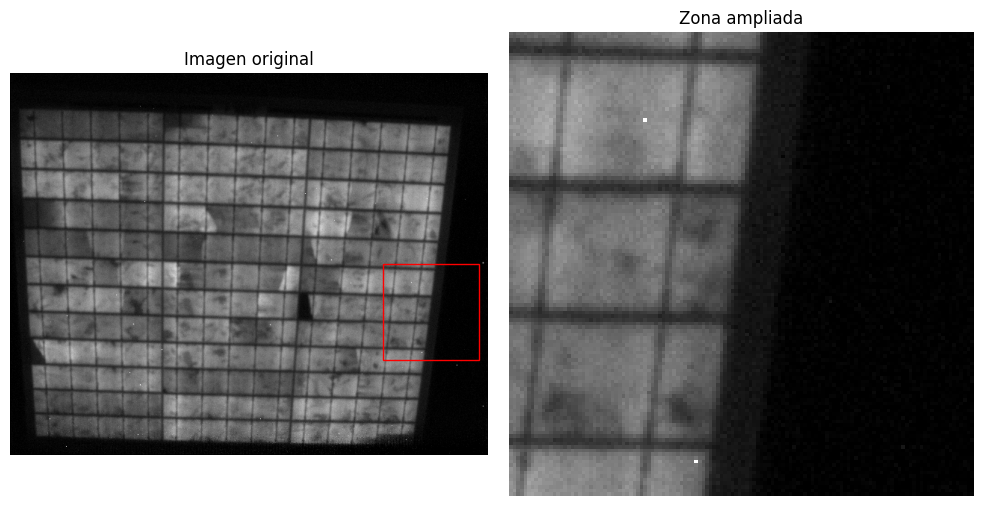

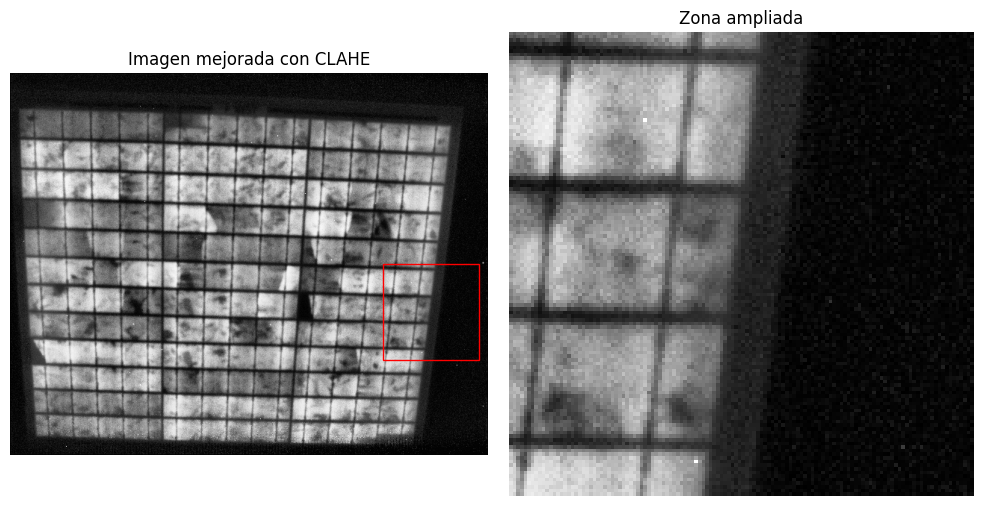

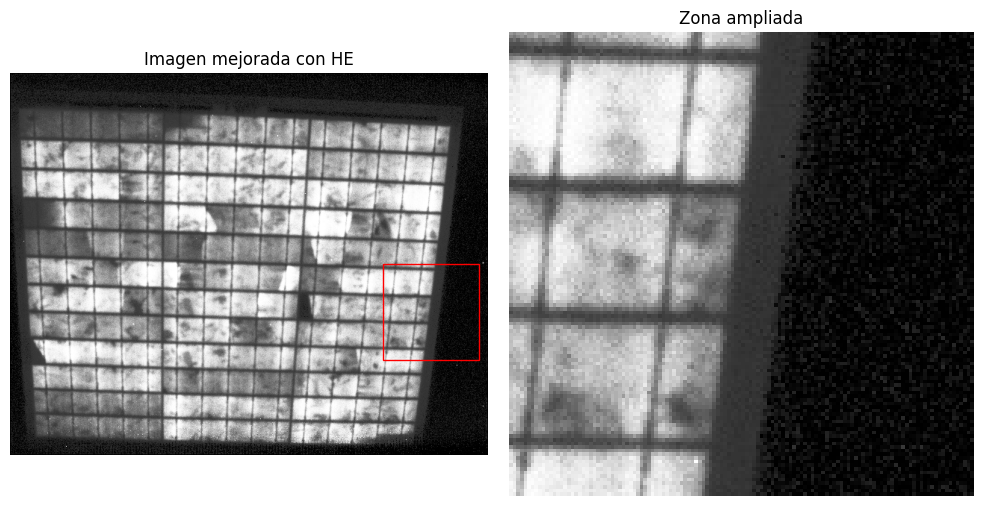

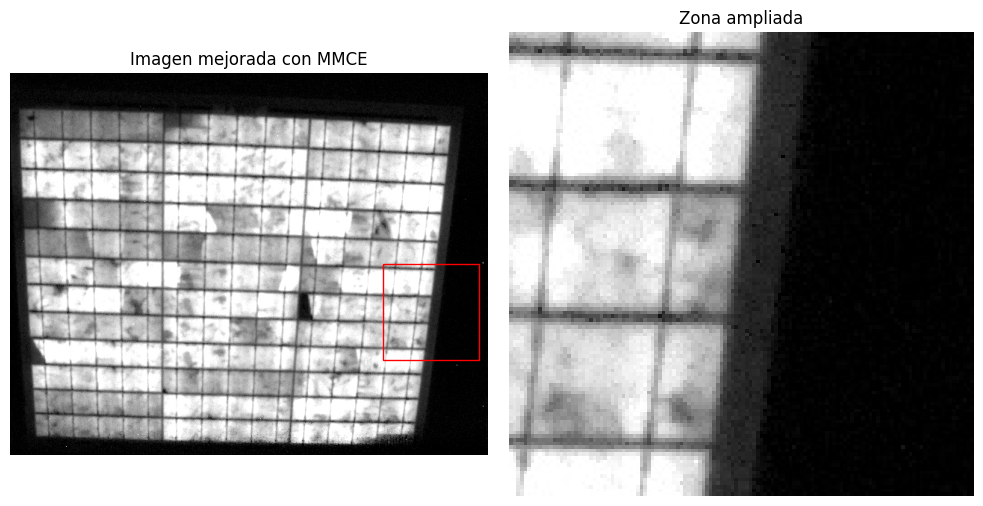

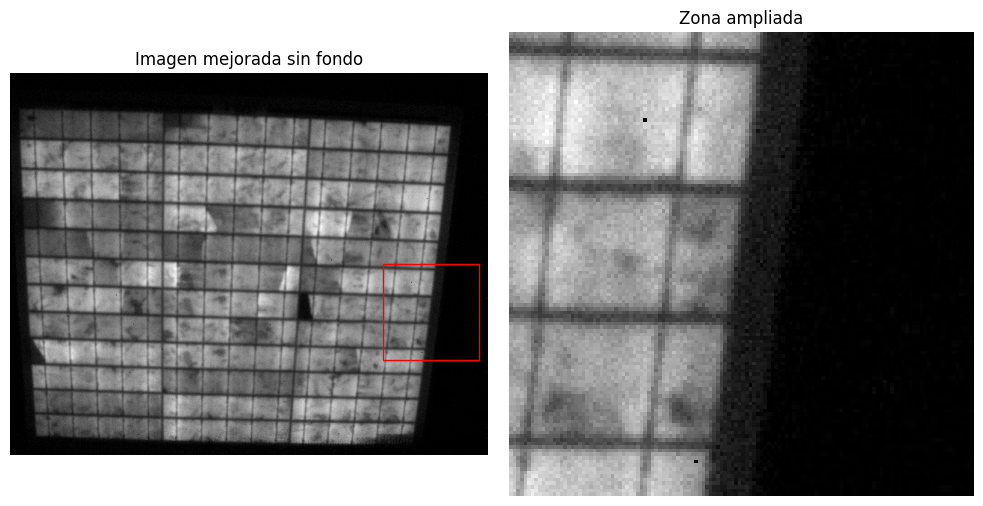

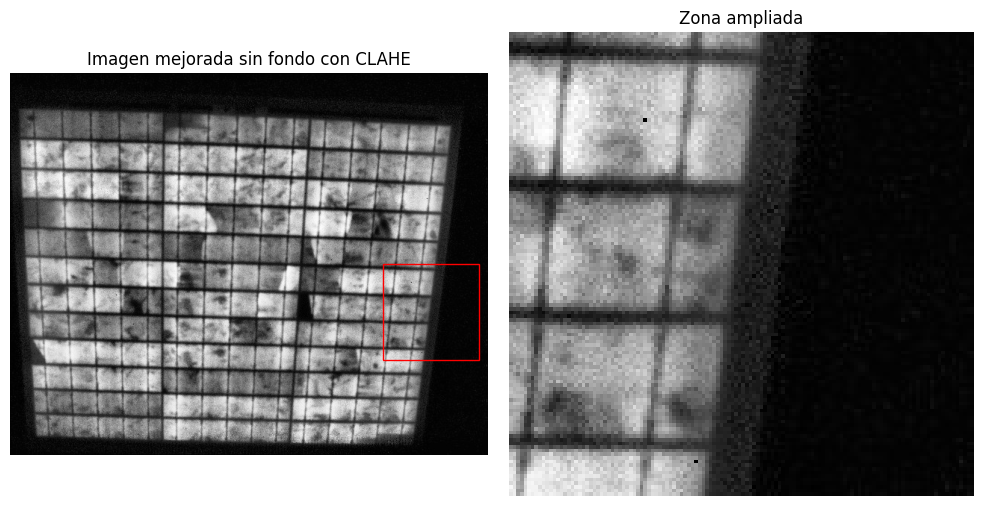

In [14]:
mostrar_imagen_con_roi(imagen_original, roi, 'Imagen original', (roi_x, roi_y), roi_ancho, roi_alto)
mostrar_imagen_con_roi(imagen_mejorada_CLAHE, roi_CLAHE, 'Imagen mejorada con CLAHE', (roi_x, roi_y), roi_ancho, roi_alto)
mostrar_imagen_con_roi(imagen_mejorada_HE, roi_HE, 'Imagen mejorada con HE', (roi_x, roi_y), roi_ancho, roi_alto)
mostrar_imagen_con_roi(imagen_mejorada_MMCE, roi_MMCE, 'Imagen mejorada con MMCE', (roi_x, roi_y), roi_ancho, roi_alto)
mostrar_imagen_con_roi(imagen_mejorada_NoBG, roi_NoBG, 'Imagen mejorada sin fondo', (roi_x, roi_y), roi_ancho, roi_alto)
mostrar_imagen_con_roi(imagen_mejorada_NoBG_CLAHE, roi_NoBG_CLAHE, 'Imagen mejorada sin fondo con CLAHE', (roi_x, roi_y), roi_ancho, roi_alto)
